In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

import pickle

from sklearn import preprocessing

from yellowbrick.features import FeatureImportances
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import Ridge

pd.set_option('display.max_columns', 100)

In [4]:
data = pd.read_csv('../data/CrimeData.csv', dtype={'BLOCK_GROUP': object})

In [5]:
data.head()

,Unnamed: 0,BLOCK_GROUP,YEAR,MONTH,DAY,TOD,CRIME_COUNTS,APPARENT_TEMP,CLOUD_COVER,DEW_POINT,HUMIDITY,PRECIP_INTENSITY,PRECIP_PROB,PRESSURE,TEMPERATURE,UV_INDEX,VISIBILITY,WIND_SPEED,TOTAL_POP,PERCAPTIA_INCOME,MEDIAN_HOUSEHOLD_INC,MEDIAN_AGE,HOUSING_UNITS_NUM,CRIME_RATE,WEEKDAY,CRIME_CATEGORY,BLOCKGROUP_FREQ,BLOCKGROUP_CATEGORY
0,0,0001001,2013,1,10,Early Morning,1,44.43,0.34,27.77,0.52,0.0000,0.00,1031.65,44.43,0.0,5.77,0.74,1240.0,109147.0,104083.0,37.0,743.0,80.645161,3.0,2.0,0.086051,0.0
1,1,0001001,2013,1,30,Night,1,57.28,0.98,55.38,0.93,0.1323,0.99,996.10,57.28,0.0,3.57,1.33,1240.0,109147.0,104083.0,37.0,743.0,80.645161,2.0,2.0,0.086051,0.0
2,2,0001001,2013,2,4,Evening,1,32.68,0.91,18.64,0.56,0.0000,0.00,1015.17,32.68,0.0,6.67,0.36,1240.0,109147.0,104083.0,37.0,743.0,80.645161,0.0,2.0,0.086051,0.0
3,3,0001001,2013,2,14,Afternoon,1,43.85,0.00,28.66,0.55,0.0053,0.22,1016.32,43.85,4.0,6.54,2.49,1240.0,109147.0,104083.0,37.0,743.0,80.645161,3.0,2.0,0.086051,0.0
4,4,0001001,2013,3,8,Mid Afternoon,1,44.84,0.72,27.55,0.44,0.0000,0.00,1020.88,48.26,1.0,6.40,7.55,1240.0,109147.0,104083.0,37.0,743.0,80.645161,4.0,2.0,0.086051,0.0


In [6]:
data2 = pd.get_dummies(data, prefix=['WKDAY'], columns=['WEEKDAY'])
data2 = pd.get_dummies(data2, prefix=['TOD'], columns=['TOD'])
data2 = pd.get_dummies(data2, prefix=['BG_CAT'], columns=['BLOCKGROUP_CATEGORY'])
data2 = pd.get_dummies(data2, prefix=['YEAR'], columns=['YEAR'])
data2 = pd.get_dummies(data2, prefix=['MONTH'], columns=['MONTH'])

In [7]:
data2.head(5)

,Unnamed: 0,BLOCK_GROUP,DAY,CRIME_COUNTS,APPARENT_TEMP,CLOUD_COVER,DEW_POINT,HUMIDITY,PRECIP_INTENSITY,PRECIP_PROB,PRESSURE,TEMPERATURE,UV_INDEX,VISIBILITY,WIND_SPEED,TOTAL_POP,PERCAPTIA_INCOME,MEDIAN_HOUSEHOLD_INC,MEDIAN_AGE,HOUSING_UNITS_NUM,CRIME_RATE,CRIME_CATEGORY,BLOCKGROUP_FREQ,WKDAY_0.0,WKDAY_1.0,WKDAY_2.0,WKDAY_3.0,WKDAY_4.0,WKDAY_5.0,WKDAY_6.0,TOD_Afternoon,TOD_Early Morning,TOD_Evening,TOD_Late Night,TOD_Mid Afternoon,TOD_Midnight,TOD_Morning,TOD_Night,BG_CAT_0.0,BG_CAT_1.0,BG_CAT_2.0,BG_CAT_3.0,BG_CAT_4.0,BG_CAT_5.0,YEAR_2013,YEAR_2014,YEAR_2015,YEAR_2016,YEAR_2017,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12
0,0,0001001,10,1,44.43,0.34,27.77,0.52,0.0000,0.00,1031.65,44.43,0.0,5.77,0.74,1240.0,109147.0,104083.0,37.0,743.0,80.645161,2.0,0.086051,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0001001,30,1,57.28,0.98,55.38,0.93,0.1323,0.99,996.10,57.28,0.0,3.57,1.33,1240.0,109147.0,104083.0,37.0,743.0,80.645161,2.0,0.086051,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2,0001001,4,1,32.68,0.91,18.64,0.56,0.0000,0.00,1015.17,32.68,0.0,6.67,0.36,1240.0,109147.0,104083.0,37.0,743.0,80.645161,2.0,0.086051,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,3,0001001,14,1,43.85,0.00,28.66,0.55,0.0053,0.22,1016.32,43.85,4.0,6.54,2.49,1240.0,109147.0,104083.0,37.0,743.0,80.645161,2.0,0.086051,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,4,0001001,8,1,44.84,0.72,27.55,0.44,0.0000,0.00,1020.88,48.26,1.0,6.40,7.55,1240.0,109147.0,104083.0,37.0,743.0,80.645161,2.0,0.086051,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [8]:
list(data2.columns)


['Unnamed: 0',
 'BLOCK_GROUP',
 'DAY',
 'CRIME_COUNTS',
 'APPARENT_TEMP',
 'CLOUD_COVER',
 'DEW_POINT',
 'HUMIDITY',
 'PRECIP_INTENSITY',
 'PRECIP_PROB',
 'PRESSURE',
 'TEMPERATURE',
 'UV_INDEX',
 'VISIBILITY',
 'WIND_SPEED',
 'TOTAL_POP',
 'PERCAPTIA_INCOME',
 'MEDIAN_HOUSEHOLD_INC',
 'MEDIAN_AGE',
 'HOUSING_UNITS_NUM',
 'CRIME_RATE',
 'CRIME_CATEGORY',
 'BLOCKGROUP_FREQ',
 'WKDAY_0.0',
 'WKDAY_1.0',
 'WKDAY_2.0',
 'WKDAY_3.0',
 'WKDAY_4.0',
 'WKDAY_5.0',
 'WKDAY_6.0',
 'TOD_Afternoon',
 'TOD_Early Morning',
 'TOD_Evening',
 'TOD_Late Night',
 'TOD_Mid Afternoon',
 'TOD_Midnight',
 'TOD_Morning',
 'TOD_Night',
 'BG_CAT_0.0',
 'BG_CAT_1.0',
 'BG_CAT_2.0',
 'BG_CAT_3.0',
 'BG_CAT_4.0',
 'BG_CAT_5.0',
 'YEAR_2013',
 'YEAR_2014',
 'YEAR_2015',
 'YEAR_2016',
 'YEAR_2017',
 'MONTH_1',
 'MONTH_2',
 'MONTH_3',
 'MONTH_4',
 'MONTH_5',
 'MONTH_6',
 'MONTH_7',
 'MONTH_8',
 'MONTH_9',
 'MONTH_10',
 'MONTH_11',
 'MONTH_12']

In [9]:
dataML = data2.drop(columns = ['Unnamed: 0', 'DAY', 'CRIME_COUNTS', 'APPARENT_TEMP', 'CLOUD_COVER',
                               'DEW_POINT', 'HUMIDITY', 'PRECIP_PROB', 'PRESSURE', 'VISIBILITY', 'WIND_SPEED', 
                               'TOTAL_POP', 'PERCAPTIA_INCOME', 'MEDIAN_HOUSEHOLD_INC', 'MEDIAN_AGE', 
                               'HOUSING_UNITS_NUM'])
             

In [10]:
dataML2 = data2.drop(columns = ['Unnamed: 0', 'CRIME_COUNTS', 'TOTAL_POP', 'PERCAPTIA_INCOME', 
                                'MEDIAN_HOUSEHOLD_INC', 'MEDIAN_AGE', 'HOUSING_UNITS_NUM'])

In [11]:
list(dataML2.columns)

['BLOCK_GROUP',
 'DAY',
 'APPARENT_TEMP',
 'CLOUD_COVER',
 'DEW_POINT',
 'HUMIDITY',
 'PRECIP_INTENSITY',
 'PRECIP_PROB',
 'PRESSURE',
 'TEMPERATURE',
 'UV_INDEX',
 'VISIBILITY',
 'WIND_SPEED',
 'CRIME_RATE',
 'CRIME_CATEGORY',
 'BLOCKGROUP_FREQ',
 'WKDAY_0.0',
 'WKDAY_1.0',
 'WKDAY_2.0',
 'WKDAY_3.0',
 'WKDAY_4.0',
 'WKDAY_5.0',
 'WKDAY_6.0',
 'TOD_Afternoon',
 'TOD_Early Morning',
 'TOD_Evening',
 'TOD_Late Night',
 'TOD_Mid Afternoon',
 'TOD_Midnight',
 'TOD_Morning',
 'TOD_Night',
 'BG_CAT_0.0',
 'BG_CAT_1.0',
 'BG_CAT_2.0',
 'BG_CAT_3.0',
 'BG_CAT_4.0',
 'BG_CAT_5.0',
 'YEAR_2013',
 'YEAR_2014',
 'YEAR_2015',
 'YEAR_2016',
 'YEAR_2017',
 'MONTH_1',
 'MONTH_2',
 'MONTH_3',
 'MONTH_4',
 'MONTH_5',
 'MONTH_6',
 'MONTH_7',
 'MONTH_8',
 'MONTH_9',
 'MONTH_10',
 'MONTH_11',
 'MONTH_12']

In [12]:
y_Rate = dataML.CRIME_RATE
y_Cat = dataML.CRIME_CATEGORY

In [ ]:
#Needed for some of the yellowbrick functions
y1_yb = np.array(data3['CrimeRate'].tolist())
y1_yb = y1_yb.reshape(-1, 1)

In [14]:
X = dataML.drop(columns = ['BLOCK_GROUP', 'CRIME_RATE', 'CRIME_CATEGORY', 'BLOCKGROUP_FREQ'])
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit(X).transform(X)
X_scaled = pd.DataFrame(X_scaled)

In [15]:
X2 = dataML2.drop(columns = ['BLOCK_GROUP', 'CRIME_RATE', 'CRIME_CATEGORY', 'BG_CAT_0.0',
                             'BG_CAT_1.0', 'BG_CAT_2.0', 'BG_CAT_3.0', 'BG_CAT_4.0', 'BG_CAT_5.0'])
scaler = preprocessing.StandardScaler()
X2_scaled = scaler.fit(X2).transform(X2)
X2_scaled = pd.DataFrame(X2_scaled)
y2_Cat = dataML2.CRIME_CATEGORY

In [16]:
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
    
rmf = RandomForestClassifier()
rfecv = RFECV(estimator=rmf, step=1, cv=StratifiedKFold(12), scoring='accuracy', verbose = 10, n_jobs = -1)
rfecv.fit(X2 , y2_Cat)
optimal_features = rfecv.n_features_

print("Optimal number of features : %d" % rfecv.n_features_)

Fitting estimator with 45 features.
Fitting estimator with 44 features.
Optimal number of features : 43


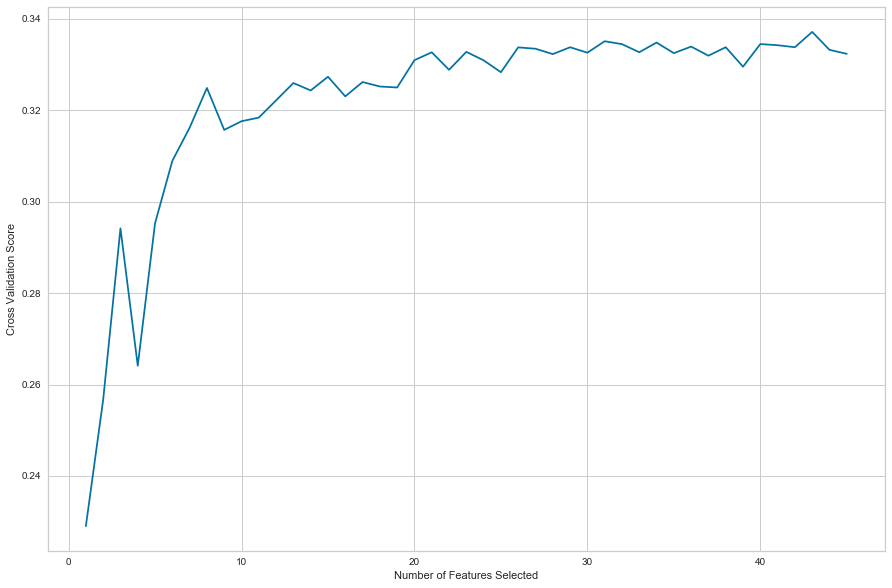

In [21]:
plt.figure(figsize=(15, 10))
plt.xlabel("Number of Features Selected")
plt.ylabel("Cross Validation Score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [25]:
with open('../Pickle/OptimalFeatures.pickle', 'wb') as features:
        pickle.dump([optimal_features, rfecv] , features)

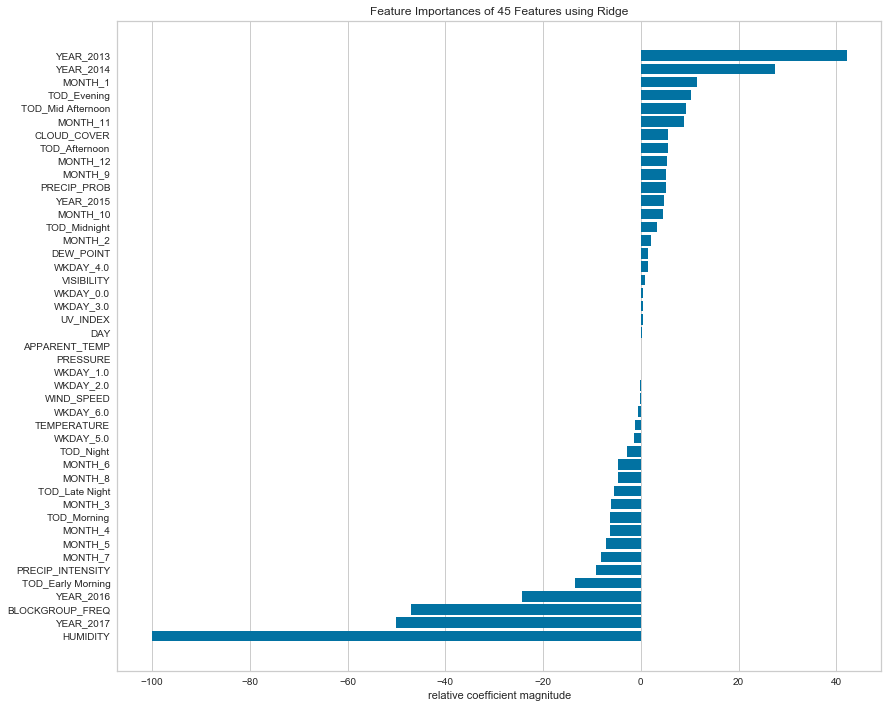

In [69]:
ridge = Ridge(alpha=1)
ridge.fit(X2, y_Rate)

# Create a new matplotlib figure
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(figsize=(10,10))

viz = FeatureImportances(ridge, ax=ax, size=(900, 720))
viz.fit(X2, y_Rate)
viz.poof()

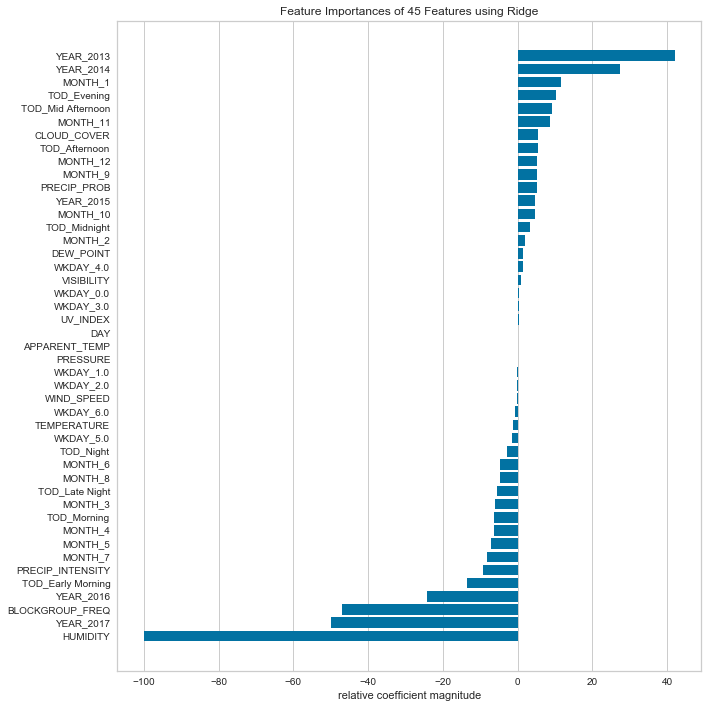

In [67]:
ridge = Ridge(alpha=1)
ridge.fit(X2_scaled, y_Rate)

# Create a new matplotlib figure
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(figsize=(10,10))

viz = FeatureImportances(ridge, ax=ax)
viz.fit(X2, y_Rate)
viz.poof()

In [31]:
X2_scaled.columns

RangeIndex(start=0, stop=41, step=1)

In [32]:
print (X2.columns)

Index(['DAY', 'APPARENT_TEMP', 'CLOUD_COVER', 'DEW_POINT', 'HUMIDITY',
       'PRECIP_INTENSITY', 'PRECIP_PROB', 'PRESSURE', 'TEMPERATURE',
       'UV_INDEX', 'VISIBILITY', 'WIND_SPEED', 'BLOCKGROUP_FREQ', 'WKDAY_0.0',
       'WKDAY_1.0', 'WKDAY_2.0', 'WKDAY_3.0', 'WKDAY_4.0', 'WKDAY_5.0',
       'WKDAY_6.0', 'TOD_Afternoon', 'TOD_Early Morning', 'TOD_Evening',
       'TOD_Late Night', 'TOD_Mid Afternoon', 'TOD_Midnight', 'TOD_Morning',
       'TOD_Night', 'YEAR_2013', 'YEAR_2014', 'YEAR_2015', 'YEAR_2016',
       'YEAR_2017', 'MONTH_1', 'MONTH_2', 'MONTH_3', 'MONTH_4', 'MONTH_5',
       'MONTH_6', 'MONTH_7', 'MONTH_8', 'MONTH_9', 'MONTH_10', 'MONTH_11',
       'MONTH_12'],
      dtype='object')


In [33]:
X2_scaled.columns = ['DAY', 'APPARENT_TEMP', 'CLOUD_COVER', 'DEW_POINT', 'HUMIDITY',
       'PRECIP_INTENSITY', 'PRECIP_PROB', 'PRESSURE', 'TEMPERATURE',
       'UV_INDEX', 'VISIBILITY', 'WIND_SPEED', 'BLOCKGROUP_FREQ', 'WKDAY_0.0',
       'WKDAY_1.0', 'WKDAY_2.0', 'WKDAY_3.0', 'WKDAY_4.0', 'WKDAY_5.0',
       'WKDAY_6.0', 'TOD_Afternoon', 'TOD_Early Morning', 'TOD_Evening',
       'TOD_Late Night', 'TOD_Mid Afternoon', 'TOD_Midnight', 'TOD_Morning',
       'TOD_Night', 'YEAR_2013', 'YEAR_2014', 'YEAR_2015', 'YEAR_2016',
       'YEAR_2017', 'MONTH_1', 'MONTH_2', 'MONTH_3', 'MONTH_4', 'MONTH_5',
       'MONTH_6', 'MONTH_7', 'MONTH_8', 'MONTH_9', 'MONTH_10', 'MONTH_11',
       'MONTH_12']

In [34]:
X2_scaled.head()

,DAY,APPARENT_TEMP,CLOUD_COVER,DEW_POINT,HUMIDITY,PRECIP_INTENSITY,PRECIP_PROB,PRESSURE,TEMPERATURE,UV_INDEX,VISIBILITY,WIND_SPEED,BLOCKGROUP_FREQ,WKDAY_0.0,WKDAY_1.0,WKDAY_2.0,WKDAY_3.0,WKDAY_4.0,WKDAY_5.0,WKDAY_6.0,TOD_Afternoon,TOD_Early Morning,TOD_Evening,TOD_Late Night,TOD_Mid Afternoon,TOD_Midnight,TOD_Morning,TOD_Night,YEAR_2013,YEAR_2014,YEAR_2015,YEAR_2016,YEAR_2017,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12
0,-0.678440,-0.834075,-0.326869,-1.055637,-0.753499,-0.177640,-0.318836,2.000123,-0.885197,-0.698027,-1.280371,-0.490610,-0.845841,-0.403943,-0.402501,-0.403509,2.490892,-0.430125,-0.419209,-0.39655,-0.427920,4.266101,-0.461227,-0.245897,-0.446427,-0.356565,-0.377655,-0.431413,2.003299,-0.519442,-0.510529,-0.502555,-0.467969,3.449422,-0.255170,-0.275137,-0.29025,-0.312319,-0.313817,-0.320581,-0.317767,-0.31453,-0.320838,-0.301315,-0.301338
1,1.605543,-0.161737,1.432575,0.418668,1.464613,9.321643,4.806328,-3.071338,-0.154738,-0.698027,-2.785256,-0.142557,-0.845841,-0.403943,-0.402501,2.478259,-0.401463,-0.430125,-0.419209,-0.39655,-0.427920,-0.234406,-0.461227,-0.245897,-0.446427,-0.356565,-0.377655,2.317962,2.003299,-0.519442,-0.510529,-0.502555,-0.467969,3.449422,-0.255170,-0.275137,-0.29025,-0.312319,-0.313817,-0.320581,-0.317767,-0.31453,-0.320838,-0.301315,-0.301338
2,-1.363635,-1.448859,1.240135,-1.543157,-0.537098,-0.177640,-0.318836,-0.350866,-1.553125,-0.698027,-0.664736,-0.714779,-0.845841,2.475594,-0.402501,-0.403509,-0.401463,-0.430125,-0.419209,-0.39655,-0.427920,-0.234406,2.168131,-0.245897,-0.446427,-0.356565,-0.377655,-0.431413,2.003299,-0.519442,-0.510529,-0.502555,-0.467969,-0.289904,3.918951,-0.275137,-0.29025,-0.312319,-0.313817,-0.320581,-0.317767,-0.31453,-0.320838,-0.301315,-0.301338
3,-0.221643,-0.864422,-1.261573,-1.008114,-0.591198,0.202906,0.820090,-0.186811,-0.918167,1.028273,-0.753661,0.541749,-0.845841,-0.403943,-0.402501,-0.403509,2.490892,-0.430125,-0.419209,-0.39655,2.336888,-0.234406,-0.461227,-0.245897,-0.446427,-0.356565,-0.377655,-0.431413,2.003299,-0.519442,-0.510529,-0.502555,-0.467969,-0.289904,3.918951,-0.275137,-0.29025,-0.312319,-0.313817,-0.320581,-0.317767,-0.31453,-0.320838,-0.301315,-0.301338
4,-0.906838,-0.812623,0.717801,-1.067385,-1.186302,-0.177640,-0.318836,0.463706,-0.667480,-0.266452,-0.849427,3.526741,-0.845841,-0.403943,-0.402501,-0.403509,-0.401463,2.324906,-0.419209,-0.39655,-0.427920,-0.234406,-0.461227,-0.245897,2.240006,-0.356565,-0.377655,-0.431413,2.003299,-0.519442,-0.510529,-0.502555,-0.467969,-0.289904,-0.255170,3.634552,-0.29025,-0.312319,-0.313817,-0.320581,-0.317767,-0.31453,-0.320838,-0.301315,-0.301338


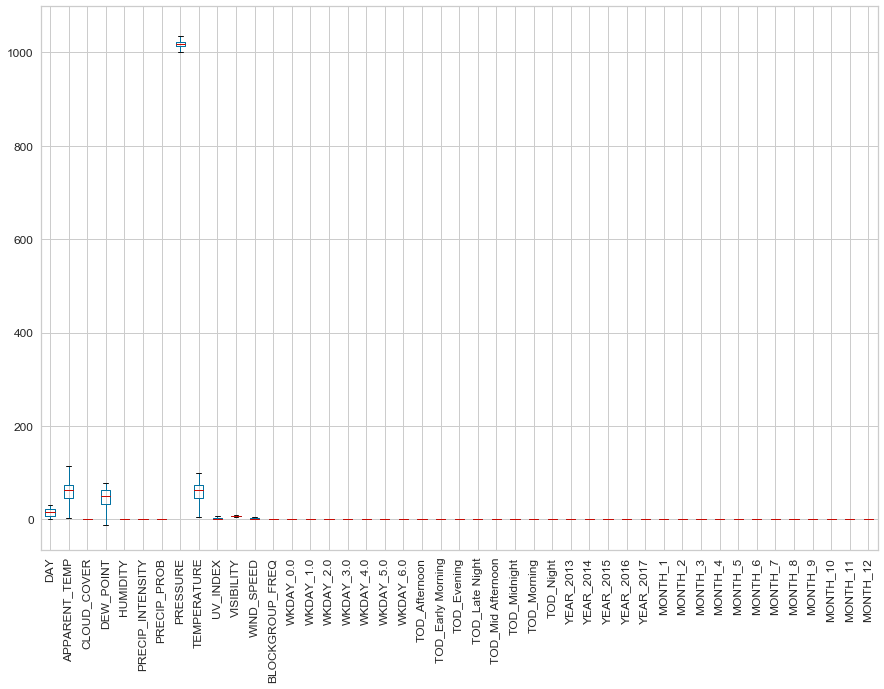

In [35]:
boxplot = X2.boxplot(rot=90, fontsize=12, figsize=(15,10))

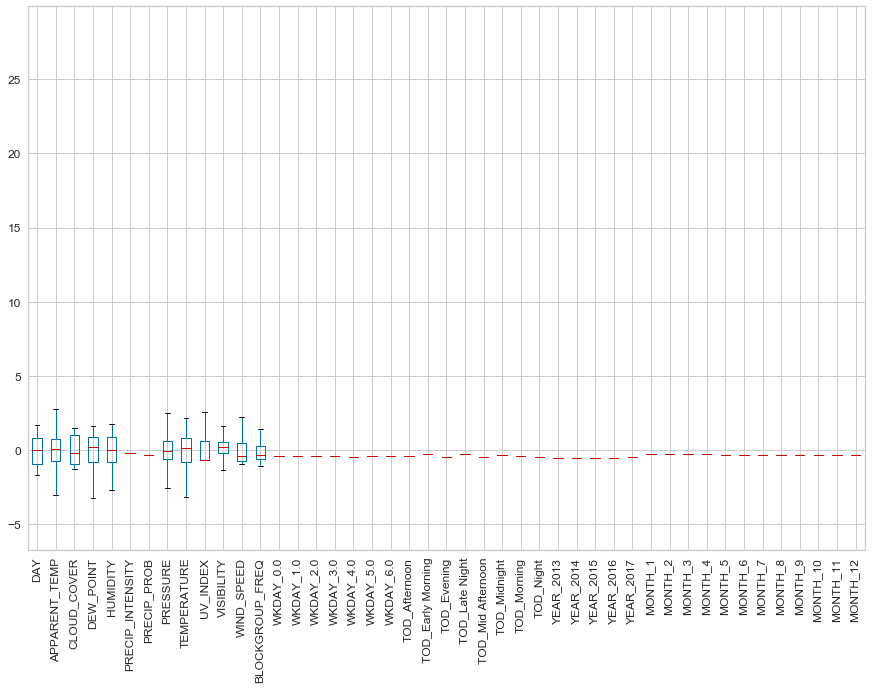

In [36]:
boxplot = X2_scaled.boxplot(rot=90, fontsize=12, figsize=(15,10))

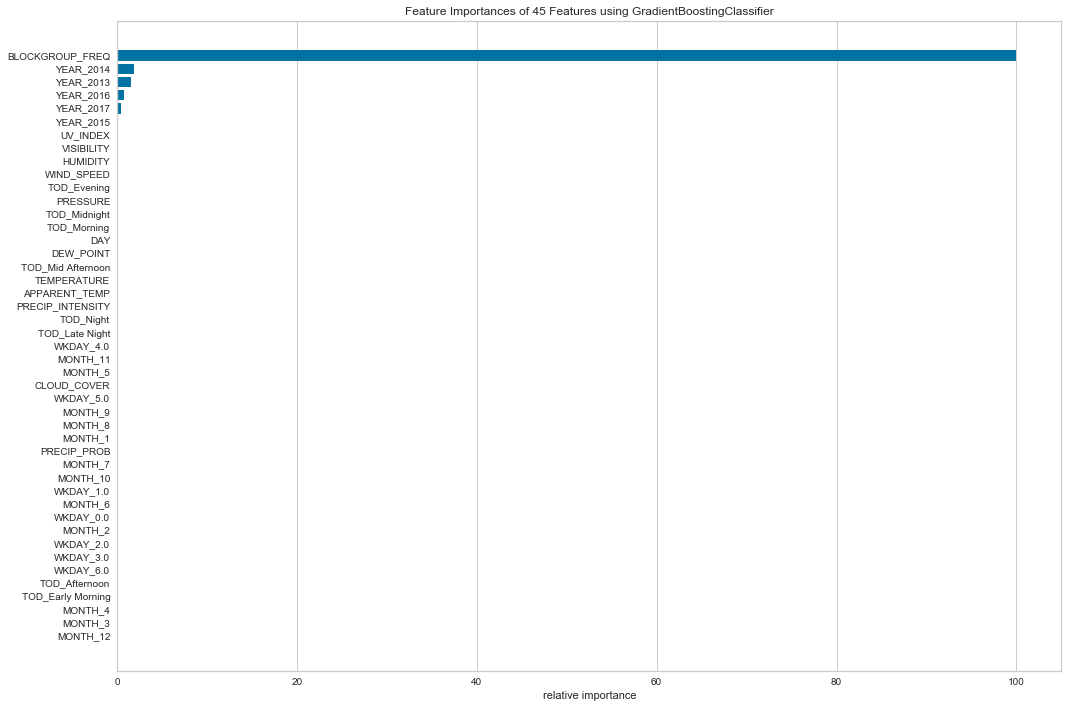

In [39]:
viz = FeatureImportances(GradientBoostingClassifier(), size=(1080, 720))
viz.fit(X2_scaled, y_Cat)
viz.poof()

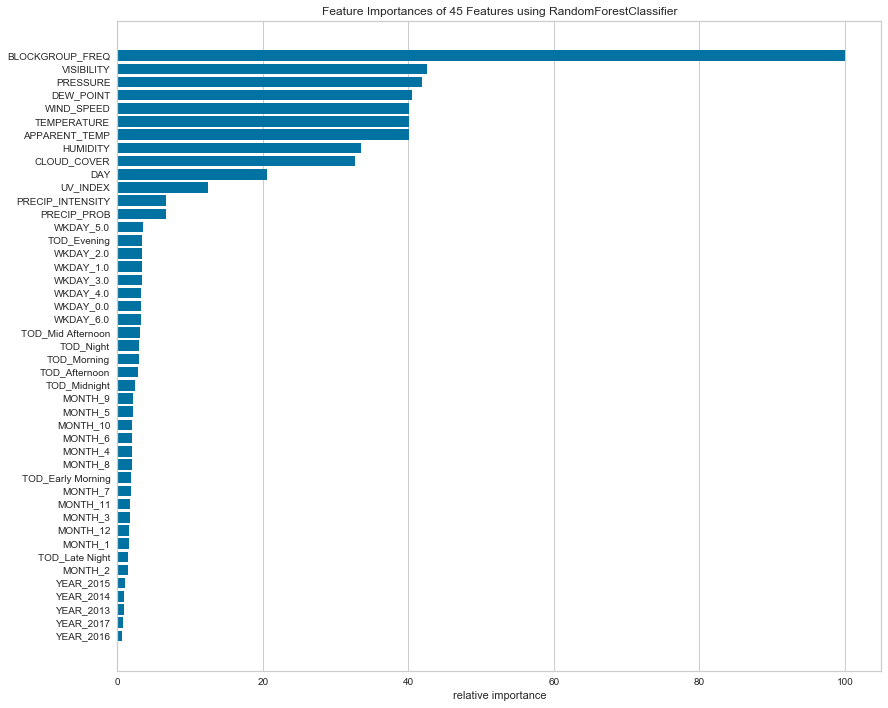

In [68]:
model = RandomForestClassifier(n_estimators=10)
viz = FeatureImportances(model, size=(900, 720))

viz.fit(X2_scaled, y_Cat)
# Note: the FeatureImportances visualizer is a model visualizer,
# not a feature visualizer, so it doesn't have a transform method!
viz.poof()

In [50]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

modelX2 = Ridge()
modelX2.fit(X2, y_Rate)
X2_featureList = list(zip(X2, modelX2.coef_.tolist()))

modelX2_scaled = Ridge()
modelX2_scaled.fit(X2_scaled, y_Rate)
X2_scaled_featureList = list(zip(X2_scaled, modelX2_scaled.coef_.tolist()))

In [77]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

modelX2 = Ridge()
modelX2.fit(X2, y_Rate)
X2_featureList = list(zip(X2, modelX2.coef_.tolist()))

In [51]:
X2_featureList

[('DAY', 0.024268133629965886),
 ('APPARENT_TEMP', 0.0018494841553010285),
 ('CLOUD_COVER', 0.6078583364131744),
 ('DEW_POINT', 0.16101338291498313),
 ('HUMIDITY', -10.871127425965932),
 ('PRECIP_INTENSITY', -0.9941708108279147),
 ('PRECIP_PROB', 0.5597519691885959),
 ('PRESSURE', 0.0014366392693874036),
 ('TEMPERATURE', -0.13660619879649158),
 ('UV_INDEX', 0.039514720531087795),
 ('VISIBILITY', 0.09133494372854606),
 ('WIND_SPEED', -0.021582518668525518),
 ('BLOCKGROUP_FREQ', -5.107108461957245),
 ('WKDAY_0.0', 0.0552255181845994),
 ('WKDAY_1.0', -0.006994273122213249),
 ('WKDAY_2.0', -0.021389400217855233),
 ('WKDAY_3.0', 0.044227219255180986),
 ('WKDAY_4.0', 0.15469757102344892),
 ('WKDAY_5.0', -0.15666765750960965),
 ('WKDAY_6.0', -0.06909897753729555),
 ('TOD_Afternoon', 0.6006386820341899),
 ('TOD_Early Morning', -1.4667902131346715),
 ('TOD_Evening', 1.1104261932012711),
 ('TOD_Late Night', -0.6018796713215354),
 ('TOD_Mid Afternoon', 0.9959241090082811),
 ('TOD_Midnight', 0.349

In [52]:
X2_scaled_featureList

[('DAY', 0.2124560002757374),
 ('APPARENT_TEMP', 0.03040296645530188),
 ('CLOUD_COVER', 0.2213133236953271),
 ('DEW_POINT', 3.0468977136831956),
 ('HUMIDITY', -2.0243784644290037),
 ('PRECIP_INTENSITY', -0.014875442105834627),
 ('PRECIP_PROB', 0.10942519807877134),
 ('PRESSURE', 0.009909111126499422),
 ('TEMPERATURE', -2.4256929974522183),
 ('UV_INDEX', 0.09170328014587216),
 ('VISIBILITY', 0.13257044902377077),
 ('WIND_SPEED', -0.03717727886895348),
 ('BLOCKGROUP_FREQ', -2.1379931460616306),
 ('WKDAY_0.0', 0.018834891455013363),
 ('WKDAY_1.0', -0.002758909575625729),
 ('WKDAY_2.0', -0.0077511179884289395),
 ('WKDAY_3.0', 0.014899277251740459),
 ('WKDAY_4.0', 0.055741745924482146),
 ('WKDAY_5.0', -0.0562399283482303),
 ('WKDAY_6.0', -0.024009432606610568),
 ('TOD_Afternoon', 0.13592684853503217),
 ('TOD_Early Morning', -0.37539618140598413),
 ('TOD_Evening', 0.33695451078427063),
 ('TOD_Late Night', -0.19129242802050025),
 ('TOD_Mid Afternoon', 0.2872008168007349),
 ('TOD_Midnight', 0.

In [55]:
list(X2.columns)

['DAY',
 'APPARENT_TEMP',
 'CLOUD_COVER',
 'DEW_POINT',
 'HUMIDITY',
 'PRECIP_INTENSITY',
 'PRECIP_PROB',
 'PRESSURE',
 'TEMPERATURE',
 'UV_INDEX',
 'VISIBILITY',
 'WIND_SPEED',
 'BLOCKGROUP_FREQ',
 'WKDAY_0.0',
 'WKDAY_1.0',
 'WKDAY_2.0',
 'WKDAY_3.0',
 'WKDAY_4.0',
 'WKDAY_5.0',
 'WKDAY_6.0',
 'TOD_Afternoon',
 'TOD_Early Morning',
 'TOD_Evening',
 'TOD_Late Night',
 'TOD_Mid Afternoon',
 'TOD_Midnight',
 'TOD_Morning',
 'TOD_Night',
 'YEAR_2013',
 'YEAR_2014',
 'YEAR_2015',
 'YEAR_2016',
 'YEAR_2017',
 'MONTH_1',
 'MONTH_2',
 'MONTH_3',
 'MONTH_4',
 'MONTH_5',
 'MONTH_6',
 'MONTH_7',
 'MONTH_8',
 'MONTH_9',
 'MONTH_10',
 'MONTH_11',
 'MONTH_12']

In [56]:
X_ML = X2[['BLOCKGROUP_FREQ', 'TEMPERATURE', 'TOD_Afternoon', 'TOD_Early Morning', 'TOD_Evening', 'TOD_Late Night', 
                     'TOD_Mid Afternoon', 'TOD_Midnight', 'TOD_Morning', 'TOD_Night', 'UV_INDEX']].copy()

In [78]:
X_ML.head()

,BLOCKGROUP_FREQ,TEMPERATURE,TOD_Afternoon,TOD_Early Morning,TOD_Evening,TOD_Late Night,TOD_Mid Afternoon,TOD_Midnight,TOD_Morning,TOD_Night,UV_INDEX
0,0.086051,44.43,0,1,0,0,0,0,0,0,0.0
1,0.086051,57.28,0,0,0,0,0,0,0,1,0.0
2,0.086051,32.68,0,0,1,0,0,0,0,0,0.0
3,0.086051,43.85,1,0,0,0,0,0,0,0,4.0
4,0.086051,48.26,0,0,0,0,1,0,0,0,1.0


In [57]:
X_ML_scaled = X2_scaled[['BLOCKGROUP_FREQ', 'TEMPERATURE', 'TOD_Afternoon', 'TOD_Early Morning', 'TOD_Evening', 'TOD_Late Night', 
                     'TOD_Mid Afternoon', 'TOD_Midnight', 'TOD_Morning', 'TOD_Night', 'UV_INDEX']].copy()

In [80]:
X_ML_scaled.head(50)

,BLOCKGROUP_FREQ,TEMPERATURE,TOD_Afternoon,TOD_Early Morning,TOD_Evening,TOD_Late Night,TOD_Mid Afternoon,TOD_Midnight,TOD_Morning,TOD_Night,UV_INDEX
0,-0.845841,-0.885197,-0.427920,4.266101,-0.461227,-0.245897,-0.446427,-0.356565,-0.377655,-0.431413,-0.698027
1,-0.845841,-0.154738,-0.427920,-0.234406,-0.461227,-0.245897,-0.446427,-0.356565,-0.377655,2.317962,-0.698027
2,-0.845841,-1.553125,-0.427920,-0.234406,2.168131,-0.245897,-0.446427,-0.356565,-0.377655,-0.431413,-0.698027
3,-0.845841,-0.918167,2.336888,-0.234406,-0.461227,-0.245897,-0.446427,-0.356565,-0.377655,-0.431413,1.028273
4,-0.845841,-0.667480,-0.427920,-0.234406,-0.461227,-0.245897,2.240006,-0.356565,-0.377655,-0.431413,-0.266452
5,-0.845841,-1.327451,-0.427920,4.266101,-0.461227,-0.245897,-0.446427,-0.356565,-0.377655,-0.431413,-0.698027
6,-0.845841,-0.165539,-0.427920,-0.234406,-0.461227,-0.245897,2.240006,-0.356565,-0.377655,-0.431413,1.028273
7,-0.845841,-0.922714,-0.427920,-0.234406,-0.461227,-0.245897,-0.446427,-0.356565,-0.377655,2.317962,-0.698027
8,-0.845841,1.256723,2.336888,-0.234406,-0.461227,-0.245897,-0.446427,-0.356565,-0.377655,-0.431413,2.754573
9,-0.845841,-0.483303,-0.427920,-0.234406,-0.461227,-0.245897,-0.446427,-0.356565,-0.377655,2.317962,-0.698027


In [64]:
with open('../Pickle/y_Rate.pickle', 'wb') as f:
    pickle.dump(y_Rate, f)
    
with open('../Pickle/y_Cat.pickle', 'wb') as f:
    pickle.dump(y_Cat, f)
    
with open('../Pickle/X_ML.pickle', 'wb') as f:
    pickle.dump(X_ML, f)
    
with open('../Pickle/X_ML_scaled.pickle', 'wb') as f:
    pickle.dump(X_ML_scaled, f)

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

X_train, X_test, y_train, y_test = train_test_split(X_ML_scaled, y_Cat, test_size=0.3)

model = RandomForestClassifier()
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)


print('Random Forest model')
print('Accuracy score = %0.3f' % accuracy_score(expected, predicted))


# Compute and return F1 (harmonic mean of precision and recall)
print("{}: {}".format(model.__class__.__name__, f1_score(expected, predicted, average = 'micro')))
print(confusion_matrix(expected, predicted))

Random Forest model
Accuracy score = 0.635
RandomForestClassifier: 0.6354295593406809
[[ 7012  1648   523   275]
 [ 1623 13771  2677  1080]
 [  668  3692  6284  1813]
 [  412  1832  2314  5277]]


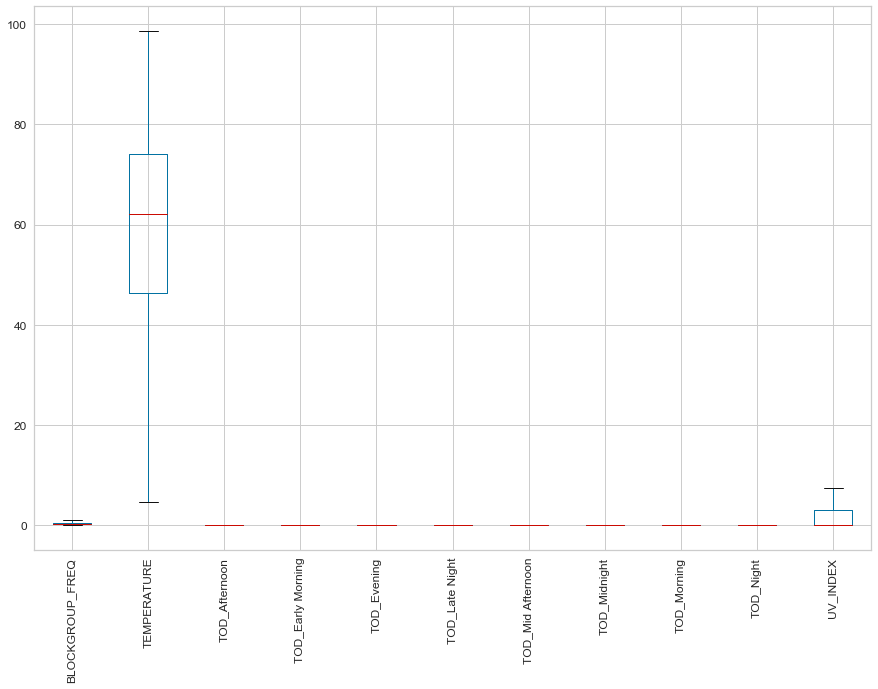

In [71]:
boxplot = X_ML.boxplot(rot=90, fontsize=12, figsize=(15,10))

In [72]:
scaler = preprocessing.StandardScaler()
X_ML_Scaled = scaler.fit(X_ML).transform(X_ML)
X_ML_Scaled = pd.DataFrame(X_ML_Scaled)
#y2_Cat = dataML2.CRIME_CATEGORY

In [74]:
print (X_ML.columns)

Index(['BLOCKGROUP_FREQ', 'TEMPERATURE', 'TOD_Afternoon', 'TOD_Early Morning',
       'TOD_Evening', 'TOD_Late Night', 'TOD_Mid Afternoon', 'TOD_Midnight',
       'TOD_Morning', 'TOD_Night', 'UV_INDEX'],
      dtype='object')


In [75]:
X_ML_Scaled.columns = ['BLOCKGROUP_FREQ', 'TEMPERATURE', 'TOD_Afternoon', 'TOD_Early Morning',
       'TOD_Evening', 'TOD_Late Night', 'TOD_Mid Afternoon', 'TOD_Midnight',
       'TOD_Morning', 'TOD_Night', 'UV_INDEX']

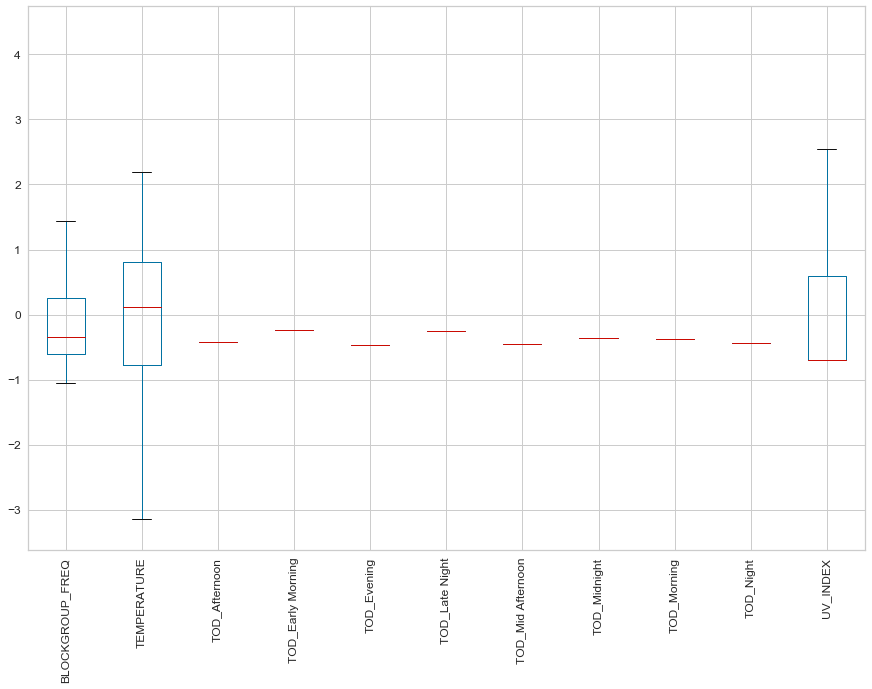

In [76]:
boxplot = X_ML_Scaled.boxplot(rot=90, fontsize=12, figsize=(15,10))